In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

data = pd.read_csv("Thecleverprogrammer.csv")
print(data.head())

         Date  Views
0  01/06/2021   7831
1  02/06/2021   7798
2  03/06/2021   7401
3  04/06/2021   7054
4  05/06/2021   7973


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    391 non-null    object
 1   Views   391 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


In [14]:
data["Date"] = pd.to_datetime(data["Date"], 
                              format="%d/%m/%Y")

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    391 non-null    datetime64[ns]
 1   Views   391 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 6.2 KB


In [16]:
data.head()

,Date,Views
0,2021-06-01,7831
1,2021-06-02,7798
2,2021-06-03,7401
3,2021-06-04,7054
4,2021-06-05,7973


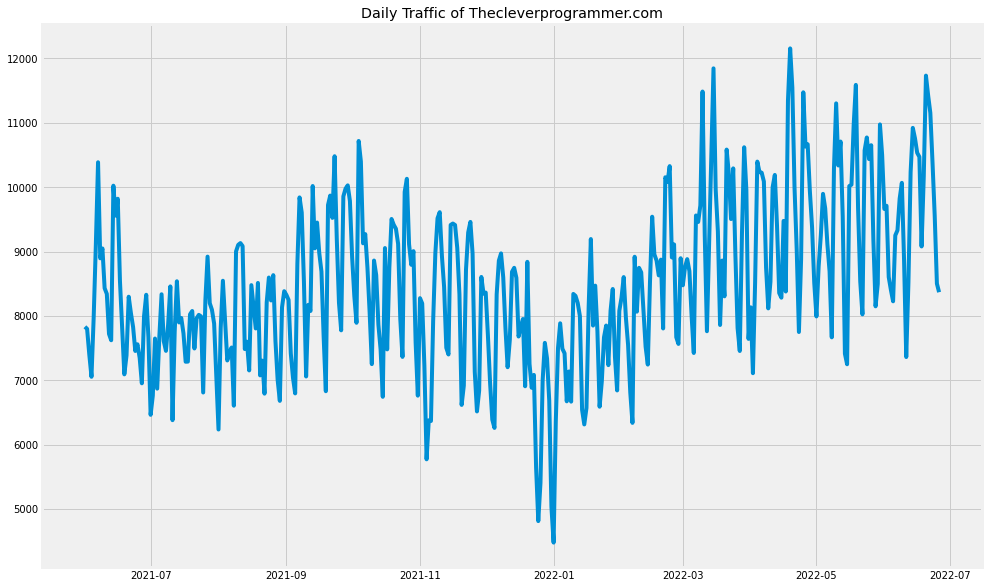

In [17]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(15,10))
plt.plot(data["Date"],data['Views'])
plt.title("Daily Traffic of Thecleverprogrammer.com")
plt.show()

In [21]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

# Check column names
print(data.columns)

# Verify 'Date' and 'Views' columns are present
if 'Date' in data.columns and 'Views' in data.columns:
    

    # Add a constant to avoid zero values
    data['AQI'] = data['AQI'] + 1

    # Alternatively, use a logarithmic transformation
    # data['Views'] = np.log1p(data['Views'])

    result = seasonal_decompose(data["AQI"], model='additive', period=30)
    fig = plt.figure()
    fig = result.plot()
    fig.set_size_inches(15, 10)
else:
    print("Column 'Date' or 'Views' not found in the DataFrame.")


TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

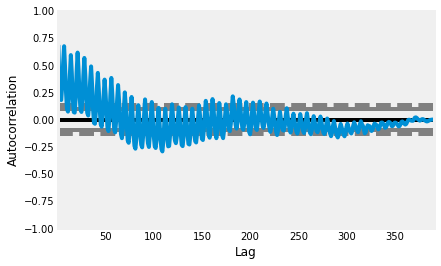

In [22]:
pd.plotting.autocorrelation_plot(data["Views"])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


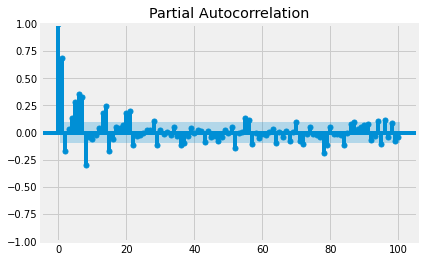

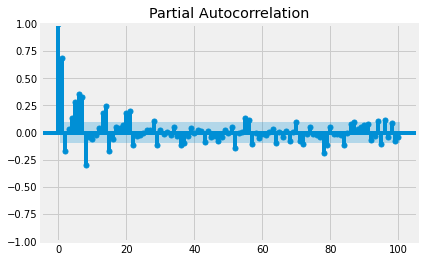

In [23]:
plot_pacf(data["Views"], lags = 100)

In [24]:
p, d, q = 5, 1, 2
model=sm.tsa.statespace.SARIMAX(data['Views'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Views   No. Observations:                  391
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood               -3099.100
Date:                            Sat, 28 Oct 2023   AIC                           6228.199
Time:                                    21:45:33   BIC                           6287.223
Sample:                                         0   HQIC                          6251.625
                                            - 391                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7879      0.130      6.055      0.000       0.533       1.043
ar.L2         -0.7836      0.135   

In [25]:
predictions = model.predict(len(data), len(data)+50)
print(predictions)

391     9866.391538
392    10769.471505
393    10730.571817
394     9853.589575
395     8751.176362
396     8199.809884
397     8912.604551
398     9686.370955
399    10265.830814
400    10612.640591
401     9865.268613
402     9342.950833
403     9007.148091
404     9053.507483
405    10515.670508
406    11000.435386
407    10912.819329
408    10093.373698
409     9429.276730
410     8601.493091
411     9157.795903
412    10364.548200
413    10609.962905
414    10797.606292
415    10255.396994
416     9419.174563
417     8976.242940
418     9122.499061
419     9871.806838
420    10226.585665
421    10726.960655
422     9903.541811
423     9513.493274
424     8997.680583
425     8793.907066
426    10124.925614
427    10849.941138
428    10917.549160
429    10402.345894
430     9423.163285
431     8657.356024
432     8688.151974
433    10047.074435
434    10520.973128
435    10862.254879
436    10475.590657
437     9319.888103
438     9132.637156
439     9316.747031
440    10276.545587


<AxesSubplot:>

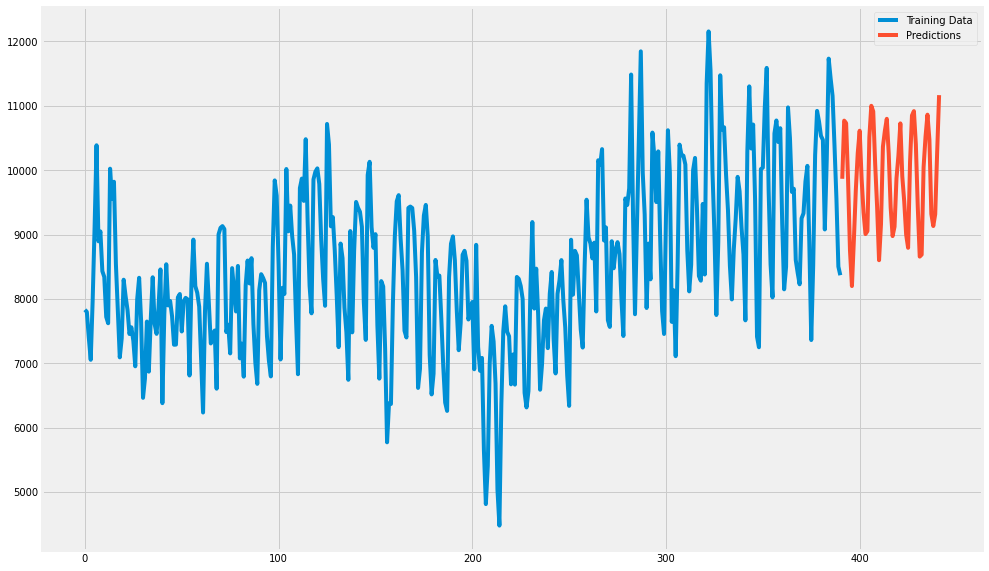

In [26]:
data["Views"].plot(legend=True, label="Training Data", 
                   figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")